In [1]:
pip install patsy


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip --V

Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\users\hp\appdata\local\programs\python\python38\python.exe -m pip <command> [options]

no such option: --V


In [3]:
pip -version

Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\users\hp\appdata\local\programs\python\python38\python.exe -m pip <command> [options]

no such option: -e


In [1]:
import pandas as pd
data=pd.read_csv(r'C:\Users\HP\Downloads\file.csv')
data=pd.DataFrame(data)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [2]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [3]:
print(data.isnull().sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [4]:
data2 = data.drop(columns=['Loan_ID'])

In [5]:
data2=data2.fillna(data2.mean())
print(data2.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_1860\2002903953.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data2=data2.fillna(data2.mean())


In [6]:
data2['Gender'].fillna(data2['Gender'].mode()[0], inplace=True)
data2['Married'].fillna(data2['Married'].mode()[0], inplace=True)
data2['Self_Employed'].fillna(data2['Self_Employed'].mode()[0], inplace=True)
data2['Dependents'].fillna(data2['Dependents'].mode()[0], inplace=True)
print(data2.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [7]:
sum(data.duplicated())

0

In [8]:
categorical_columns = ['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Status']
print(categorical_columns)

numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term ']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term ']


In [9]:
from sklearn import preprocessing
for var in categorical_columns:
    le=preprocessing.LabelEncoder()
    data2[var]=le.fit_transform(data[var].astype('str'))
data2.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int32
Loan_Status            int32
dtype: object

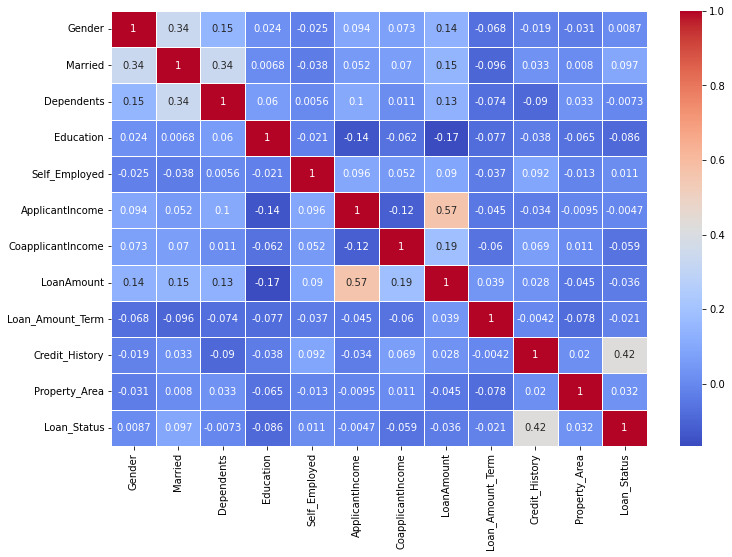

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data2.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

plt.show()

In [12]:
data2_coded = pd.get_dummies(data2,drop_first=True)
data2_coded.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1
613,0,0,0,0,1,4583,0.0,133.0,360.0,0,1,0


TRAIN TEST SPLIT

In [13]:
X = data2_coded.drop(columns='Loan_Status')
Y = data2_coded['Loan_Status']

################ Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

# DECISION TREE CLASSIFIER

In [14]:
from sklearn import tree
from sklearn.metrics import accuracy_score

tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_train,Y_train)
Y_predtest = tree_clf.predict(X_test)

print("Test Accuracy: ",accuracy_score(Y_test,Y_predtest))


Test Accuracy:  0.7073170731707317


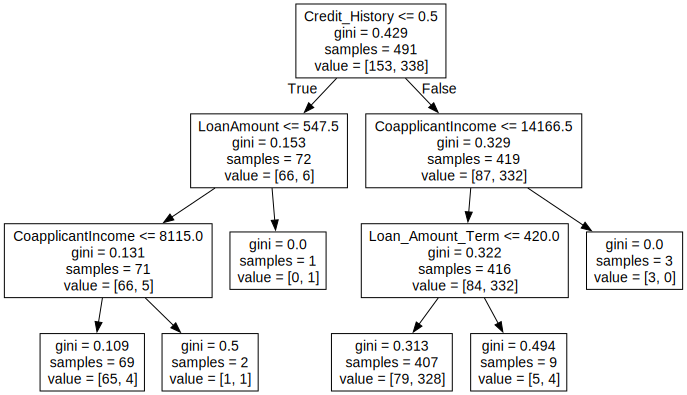

In [15]:
import graphviz 
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,Y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data) 

graph

Text(0, 0.5, 'Accuracy')

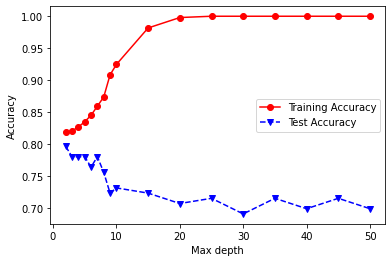

In [16]:
import matplotlib.pyplot as plt
import numpy as np
###################
# Model fitting 
###################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

# DECISION TREE AT A DEPTH OF 7

In [34]:
import graphviz 
from sklearn import tree
from sklearn.metrics import accuracy_score

tree_clf = tree.DecisionTreeClassifier(max_depth=7)
tree_clf.fit(X_train,Y_train)
Y_predtest = tree_clf.predict(X_test)
#Y_predtrain = tree_clf.predict(X_train)

print("Test Accuracy: ",accuracy_score(Y_test,Y_predtest))
#print("Test Accuracy: ",accuracy_score(X_test,Y_predTest))


Test Accuracy:  0.7804878048780488


Text(0, 0.5, 'Accuracy')

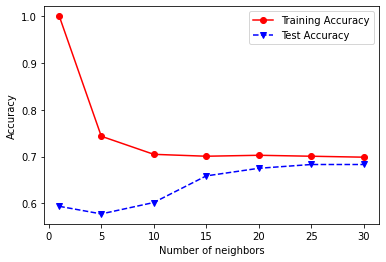

In [35]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(accuracy)

Accuracy: 0.80
0.7967479674796748


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C_values = [0.01, 0.1, 0.2, 0.5, 1, 10, 20]

trainAcc = []
testAcc = []

for param in C_values:
    svm_classifier = SVC(kernel='linear', C=param, random_state=10)
    svm_classifier.fit(X_train, Y_train)

    Y_pred_test = svm_classifier.predict(X_test)
    Y_pred_train = svm_classifier.predict(X_train)
    
    accuracy_test = accuracy_score(Y_test, Y_pred_test)
    accuracy_train = accuracy_score(Y_train, Y_pred_train)

#     print(f"Accuracy for test (C={param}): {accuracy_test:.2f}")
#     print(f"Accuracy for train (C={param}): {accuracy_train:.2f}")

    trainAcc.append(accuracy_train)
    testAcc.append(accuracy_test)

plt.plot(C_values, trainAcc, 'ro-', label='Training Accuracy')
plt.plot(C_values, testAcc, 'bv--', label='Test Accuracy')
plt.xscale('log')  
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()


Accuracy for test (C=0.01): 0.67
Accuracy for train (C=0.01): 0.69
